## Database creation via ArXiv API

In [1]:
import urllib.request
import xml.etree.ElementTree as ET
import pandas as pd

In [2]:
def fetch_papers():
    """Fetches papers from the arXiv API and returns them as a list of strings."""
    url = 'http://export.arxiv.org/api/query?search_query=ti:llama&start=0&max_results=100'
    try:
        response = urllib.request.urlopen(url)
        data = response.read().decode('utf-8')
        root = ET.fromstring(data)

        papers_list = []
        for entry in root.findall('{http://www.w3.org/2005/Atom}entry'):
            title = entry.find('{http://www.w3.org/2005/Atom}title').text
            summary = entry.find('{http://www.w3.org/2005/Atom}summary').text
            paper_info = f"Title: {title}\nSummary: {summary}\n"
            papers_list.append(paper_info)

        return papers_list

    except Exception as e:
        print(f"Error fetching papers: {e}")
        return None


In [3]:
# Test the function
papers = fetch_papers()
if papers:
    for paper in papers:
        print(paper)

Title: LLaMA Pro: Progressive LLaMA with Block Expansion
Summary:   Humans generally acquire new skills without compromising the old; however,
the opposite holds for Large Language Models (LLMs), e.g., from LLaMA to
CodeLLaMA. To this end, we propose a new post-pretraining method for LLMs with
an expansion of Transformer blocks. We tune the expanded blocks using only new
corpus, efficiently and effectively improving the model's knowledge without
catastrophic forgetting. In this paper, we experiment on the corpus of code and
math, yielding LLaMA Pro-8.3B, a versatile foundation model initialized from
LLaMA2-7B, excelling in general tasks, programming, and mathematics. LLaMA Pro
and its instruction-following counterpart (LLaMA Pro-Instruct) achieve advanced
performance among various benchmarks, demonstrating superiority over existing
open models in the LLaMA family and the immense potential of reasoning and
addressing diverse tasks as an intelligent agent. Our findings provide valuable
i

In [4]:
len(papers)

59

In [5]:
if papers:
    # Specify the text file path
    text_file_path = 'data/papers_data.txt'

    # Open the text file in write mode
    with open(text_file_path, 'w', encoding='utf-8') as textfile:
        # Write each paper string to a new line
        for paper in papers:
            textfile.write(paper + '\n\n')

    print(f"Papers saved to {text_file_path}")

Papers saved to data/papers_data.txt


In [6]:
# Create a Pandas DataFrame from the papers_list
df = pd.DataFrame(papers, columns=["PaperInfo"])

# Extract information from the "PaperInfo" column into separate columns (Title and Summary)
df[['Title', 'Summary']] = df['PaperInfo'].str.extract(r'Title: (.*)\nSummary: (.*)\n')

# Drop the original "PaperInfo" column
df.drop('PaperInfo', axis=1, inplace=True)

In [7]:
# Specify the CSV file path
pkl_file_path = 'data/papers_data.pkl'
df.to_pickle(pkl_file_path)
print(f"DataFrame saved to {pkl_file_path}")

DataFrame saved to data/papers_data.pkl


## Overview of Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    30 non-null     object
 1   Summary  30 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [9]:
df['length'] = df['Summary'].str.len()
df['length'].describe()

count    30.000000
mean     75.633333
std       3.253469
min      65.000000
25%      75.000000
50%      76.000000
75%      78.000000
max      79.000000
Name: length, dtype: float64

<Axes: >

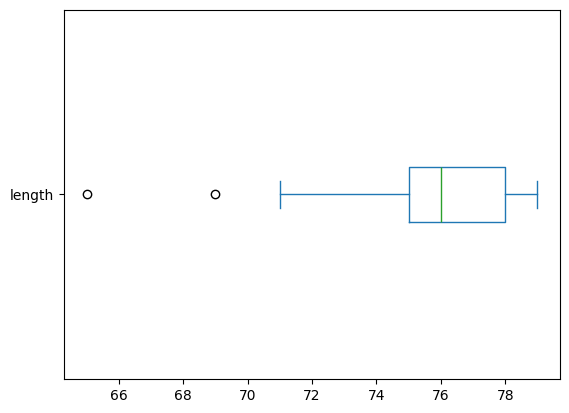

In [10]:
df['length'].plot(kind='box',vert=False)

## RAG

In [11]:
from operator import itemgetter

from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

ModuleNotFoundError: No module named 'langchain_openai'

In [40]:
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

ModuleNotFoundError: No module named 'langchain_openai'